# Визуализация. Домашняя работа

In [37]:
#отображение графиков в тетрадке
%matplotlib inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

import pandas as pd
import plotly
import seaborn as sns

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,5

In [38]:
seasons = pd.read_csv("../data/NBA/Seasons_Stats.csv")
seasons = seasons[(seasons['Tm']!='TOT')]
seasons[['Year','Tm', 'PF', 'Player', 'Year']].head()

# Year - Season
# Player - name
# Pos - Position
# Age - Age
# Tm - Team
# G - Games
# GS - Games Started
# MP - Minutes Played
# PER - Player Efficiency Rating
# TS% - True Shooting %
# 3PAr - 3-Point Attempt Rate
# FTr - Free Throw Rate
# ORB% - Offensive Rebound Percentage
# DRB% - Defensive Rebound Percentage
# TRB% - Total Rebound Percentage
# AST% - Assist Percentage
# STL% - Steal Percentage
# BLK% - Block Percentage
# TOV% - Turnover Percentage
# USG% - Usage Percentage
# blanl - 
# OWS - Offensive Win Shares
# DWS - Defensive Win Shares
# WS - Win Shares
# WS/48 - Win Shares Per 48 Minutes
# blank2 - 
# OBPM - Offensive Box Plus/Minus
# DBPM - Defensive Box Plus/Minus
# BPM - Box Plus/Minus
# VORP - Value Over Replacement
# FG - Field Goals
# FGA - Field Goal Attempts
# FG% - Field Goal Percentage
# 3P - 3-Point Field Goals
# 3PA - 3-Point Field Goal Attempts
# 3P% - 3-Point Field Goal Percentage
# 2P - 2-Point Field Goals
# 2PA - 2-Point Field Goal Attempts
# 2P% - 2-Point Field Goal Percentage
# eFG% - Effective Field Goal Percentage
# FT - Free Throws
# FTA - Free Throw Attempts
# FT% - Free Throw Percentage
# ORB - Offensive Rebounds
# DRB - Defensive Rebounds
# TRB - Total Rebounds
# AST - Assists
# STL - Steals
# BLK - Blocks
# TOV - Turnovers
# PF - Personal Fouls
# PTS - Points

,Year,Tm,PF,Player,Year
0,1950.0,FTW,217.0,Curly Armstrong,1950.0
1,1950.0,INO,99.0,Cliff Barker,1950.0
2,1950.0,CHS,192.0,Leo Barnhorst,1950.0
4,1950.0,DNN,27.0,Ed Bartels,1950.0
5,1950.0,NYK,2.0,Ed Bartels,1950.0


In [39]:
player = pd.read_csv("../data/NBA/player_data.csv")
player.head()

# name - player name
# year_start
# year_end
# position
# height
# weight
# birth_date
# college

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


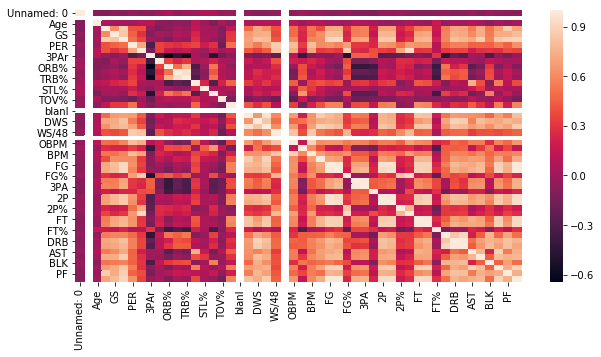

In [40]:
# Использование seaborn. Корреляция признаков
%config InlineBackend.figure_format = 'png' 
data = seasons[(seasons['Year']==2017)].groupby('Player').median().corr()
sns_corr = sns.heatmap(data)
#Картинка должна сохраниться в текущей папке
sns_corr.figure.savefig('heatmap.png')

In [41]:
# Топ игроков по очкам за 2017 год
top_players_df = seasons[(seasons['Year']==2017)].groupby('Player').sum()
    
top_players_df['mean_pts'] = top_players_df['PTS']/top_players_df['G']
top_players_df = top_players_df.sort_values(by='mean_pts', ascending=False).head(10)
top_players_df[['mean_pts']].style.bar()

,mean_pts
Player,
Russell Westbrook,31.5802
James Harden,29.0864
Isaiah Thomas,28.9342
Anthony Davis,27.9867
DeMar DeRozan,27.2973
Damian Lillard,26.9867
DeMarcus Cousins,26.9722
LeBron James,26.4054
Kawhi Leonard,25.5135


# Plotly


In [42]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [43]:
# Динамика набранных очков команд с 1950 года для первых 3 команд по итогам 2017 года
teams_data = seasons[(seasons['Year']==2017)][['Tm', 'PTS']].groupby('Tm').sum()

teams_uniq = teams_data.sort_values(by='PTS', ascending=False).head(3).index
seasons_uniq = seasons.Year.unique()

data = seasons[['Year', 'Tm', 'PTS']].groupby(['Year', 'Tm']).mean()
data = data.unstack('Tm').PTS

traces=[]
for i in teams_uniq:
    traces.append(go.Scatter(
                    x=data.index,
                    y=data[i],
                    name=i,
                    orientation = 'v')
                 )

layout = {'title': 'Teams Points'}
fig = go.Figure(data=traces, layout=layout)

iplot(fig, show_link=False)


In [44]:
# Гистограмма. Распределение игроков по количеству очков

points = seasons[(seasons.Year==2017)][['Tm', 'Player', 'PTS']]
uniq_teams = points['Tm'].unique()
uniq_players = points['Player'].unique()
uniq_teams

data = []

for team in uniq_teams:
    data.append(
         go.Histogram(
             x=points[points.Tm==team].PTS, 
             nbinsx=10,
             name='count',
             visible = (team == 'DET')
         )
    )

layout = go.Layout(
    title='User Score Distribution',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons= list([ dict(
                                args=['visible', [True if j==i else False for j in uniq_teams] ],
                                label=i,
                                method='restyle' ) for i in uniq_teams]),
        )
    ])
)


fig = {'data': data, 'layout': layout}
iplot(fig, show_link=False)


In [45]:
# Plotly. Распределение передач по типу игрока

data = []

player = seasons[['Pos', 'AST']]
positions = player['Pos'].unique()

for position in positions:
    data.append(
        go.Box( y=player[player.Pos==position].AST , 
                name=position)
    )
iplot(data, show_link = False)